In [122]:
import pandas as pd
import json
import glob
import itertools
import nltk
import numpy as np

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/peterzhang/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [73]:
def tokenize_chain(series):
    return list(itertools.chain.from_iterable(series.apply(nltk.sent_tokenize)))

To do:
- Mihalcea's multimodal deception: https://web.eecs.umich.edu/~mihalcea/downloads.html#OpenDeception
  

## Open Deception

Downloaded from Rada Mihalcea's [website](https://web.eecs.umich.edu/~mihalcea/downloads.html), based on her open-domain deception paper.

In [3]:
input_file = 'data/OpenDeception/7Truth7LiesDataset.csv'
df = pd.read_csv(input_file, quotechar="'", escapechar="\\")
df.head()

,id,_gender,age,education,country,text,class
0,1_f_l_1,Female,26,Bachelors degree,Canada,There is a great deal of truth to the anti-vax...,lie
1,1_f_l_2,Female,26,Bachelors degree,Canada,Jenny mccarthy is a learned doctor who deserve...,lie
2,1_f_l_3,Female,26,Bachelors degree,Canada,Driving doesn't really require any practice.,lie
3,1_f_l_4,Female,26,Bachelors degree,Canada,Drinking and driving is a winning and safe com...,lie
4,1_f_l_5,Female,26,Bachelors degree,Canada,Good hygiene isn't really important or attract...,lie


In [6]:
data = {}
data['lie'] = list(df[df['class']=='lie']['text']) # positive denotes lie
data['truth'] = list(df[df['class']=='truth']['text']) # negative denotes truth

In [7]:
output_file = 'output/open_deception.json'
with open(output_file, 'w') as outfile:
    json.dump(data, outfile)

## Fake News

Downloaded from Rada Mihalcea's [website](https://web.eecs.umich.edu/~mihalcea/downloads.html), based on her fake news paper.

In [16]:
files = glob.glob('data/fakeNewsDatasets/fakeNewsDataset/**/*.txt')
legit, fake = [], []
for file in files:
    with open(file, 'r') as f:
        contents = nltk.sent_tokenize(f.read())
        if 'legit' in file:
            legit.extend(contents)
        else:
            fake.extend(contents)

In [17]:
data = {}
data['legit'] = legit
data['fake'] = fake

In [19]:
output_file = 'output/fake_news.json'
with open(output_file, 'w') as outfile:
    json.dump(data, outfile)

## Real Life Deception

Downloaded from Rada Mihalcea's [website](https://web.eecs.umich.edu/~mihalcea/downloads.html), based on her real life deception paper.

In [27]:
files = glob.glob('data/RealLifeDeception/Transcription/**/*.txt')
truth, lie = [], []
for file in files:
    with open(file, 'r') as f:
        contents = nltk.sent_tokenize(f.read())
        if 'truth' in file:
            truth.extend(contents)
        else:
            lie.extend(contents)

In [28]:
data = {}
data['truth'] = truth # lie
data['lie'] = lie # truth

In [30]:
output_file = 'output/real_life_deception.json'
with open(output_file, 'w') as outfile:
    json.dump(data, outfile)

## Football

Taken from Merullo et al.'s Football Commentary [dataset](https://arxiv.org/abs/1909.03343).

In [31]:
input_file = 'data/football/football_15.json'
with open(input_file, 'r') as f:
    js_data = json.load(f)

In [32]:
white, nonwhite = [], []
for instance in js_data.values():
    race = instance['label']['race']
    commentary = ' '.join(instance['mention'])
    if race == 'white':
        white.append(commentary)
    else:
        nonwhite.append(commentary)

In [35]:
data = {}
data['white'] = white # white
data['nonwhite'] = nonwhite # nonwhite
output_file = 'output/football.json'
with open(output_file, 'w') as outfile:
    json.dump(data, outfile)

## Professor Gender

Pulled from RateMyProfessor.

In [36]:
input_file = 'data/profgender/full-data.txt'
df = pd.read_csv(input_file)

In [37]:
data = {}
data['woman'] = list(df[df['Professor Gender']=='W']['Comment Text']) # positive denotes lie
data['man'] = list(df[df['Professor Gender']=='M']['Comment Text']) # negative denotes truth

In [41]:
output_file = 'output/prof_gender.json'
with open(output_file, 'w') as outfile:
    json.dump(data, outfile)

## Parenting

Read sentences pulled from various parenting topics from [Gao et al.](https://dl.acm.org/doi/10.1145/3411764.3445203).

In [42]:
input_file = 'data/parenting/0527_reddit_1300_parenting_clean.csv'
df = pd.read_csv(input_file)
df.head()

,text,label,topics
0,So I participated in the survey re: exclusive ...,1,breastfeeding
1,I've started researching what pumps my insuran...,1,breastfeeding
2,Three and a half year old while listening to E...,1,NaN
3,"About a week ago, my 2 1/2 year old started co...",1,"economy,child product"
4,When is it positive to say your kid does not l...,1,NaN


In [46]:
df = df.dropna()
topics = set(itertools.chain.from_iterable(df['topics'].str.split(',')))
data = {}
for topic in topics:
    data[topic] = tokenize_chain(df[df['topics'].str.contains(topic)]['text'])

In [49]:
output_file = 'output/parenting.json'
with open(output_file, 'w') as outfile:
    json.dump(data, outfile)

## Polarization

From Jerry Wei's news slant [dataset](https://github.com/JerryWei03/NewB).

In [50]:
data = {}
lib_file = 'data/NewB-master/liberal.txt'
with open(lib_file, 'r') as file:
    data['lib'] = list(map(lambda x: x[2:], file.readlines()))
con_file = 'data/NewB-master/conservative.txt'
with open(con_file, 'r') as file:
    data['con'] = list(map(lambda x: x[2:], file.readlines()))


In [52]:
output_file = 'output/news_slant.json'
with open(output_file, 'w') as outfile:
    json.dump(data, outfile)

## Ukraine Bias

Annotated data from [Farber et al.](https://github.com/michaelfaerber/ukraine-news-bias) on news coverage during the Ukraine crisis.

In [74]:
input_file = 'data/ukraine/sentences-with-binary-labels-bias.csv'
df = pd.read_csv(input_file, header=None)
df.head()

,0,1
0,Russia claims thousands fleeing Ukraine,0
1,"Russia says 143,000 Ukrainians have already le...",0
2,Thousands of Ukrainians are fleeing across the...,0
3,"According to the border services, since the be...",0
4,The head of the citizenship department of the ...,0


In [75]:
data = {}
data['bias'] = tokenize_chain(df[df[1]==1][0])
data['no bias'] = tokenize_chain(df[df[1]==0][0])

In [76]:
output_file = 'output/ukraine.json'
with open(output_file, 'w') as outfile:
    json.dump(data, outfile)

## Essays

Automated essay scoring [data](https://www.kaggle.com/c/asap-aes/data?select=training_set_rel3.xlsx) from the Hewlett Foundaiton.

In [77]:
input_file = 'data/papers/training_set_rel3.tsv'
df = pd.read_csv(input_file, sep='\t', encoding='latin-1')
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
data = {}
data['bad'] = tokenize_chain(df[df['domain1_score'] < 15]['essay'])
data['mediocre'] = tokenize_chain(df[(15 <= df['domain1_score']) & (df['domain1_score'] < 25)]['essay'])
data['good'] = tokenize_chain(df[(25 <= df['domain1_score']) & (df['domain1_score'] < 35)]['essay'])
data['great'] = tokenize_chain(df[35 <= df['domain1_score']]['essay'])

In [79]:
output_file = 'output/essays.json'
with open(output_file, 'w') as outfile:
    json.dump(data, outfile)

## Diplomacy

From the [Diplomacy project](https://sites.google.com/view/qanta/projects/diplomacy) dataset.

In [142]:
files = glob.glob('data/diplomacy/*.txt')
data = {}
data['truth'] = []
data['lie'] = []
for file in files:
    df = pd.read_json(file, lines=True)
    messages = list(itertools.chain.from_iterable(pd.read_json(files[0], lines=True)['messages']))
    labels = list(itertools.chain.from_iterable(pd.read_json(files[0], lines=True)['sender_labels']))
    df = pd.DataFrame({'message':messages, 'label':labels})
    data['truth'].extend(tokenize_chain(df[df['label']==True]['message']))
    data['lie'].extend(tokenize_chain(df[df['label']==False]['message']))

In [144]:
output_file = 'output/diplomacy.json'
with open(output_file, 'w') as outfile:
    json.dump(data, outfile)

## News Headlines

From the ABC "million news headlines" [dataset](https://www.kaggle.com/therohk/million-headlines), "spam clickbait catalog" [dataset](https://www.kaggle.com/therohk/examine-the-examiner), and India news headlines [dataset](https://www.kaggle.com/therohk/india-headlines-news-dataset).

In [180]:
headline_files = [
    ('data/abc_headlines/abcnews-date-text.csv', 'output/abc_headlines.json'),
    ('data/examiner_headlines/examiner-date-text.csv', 'output/examiner_headlines.json'),
    ('data/india_headlines/india-news-headlines.csv', 'output/india_headlines.json')
]
for input_file, output_file in headline_files:
    df = pd.read_csv(input_file)
    df['year'] = df['publish_date'].astype(str).str[:4].astype(int)
    data = {}
    for year in df['year'].unique():
        data[str(year)] = list(df[df['year']==year]['headline_text'])
    with open(output_file, 'w') as outfile:
        json.dump(data, outfile)

## Search Relevance

From the "Home Depot Product Search Relevance" [dataset](https://www.kaggle.com/c/home-depot-product-search-relevance/data?select=train.csv.zip).

In [170]:
input_file = 'data/search_relevance/train.csv'
df = pd.read_csv(input_file)
df.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


<AxesSubplot:ylabel='Frequency'>

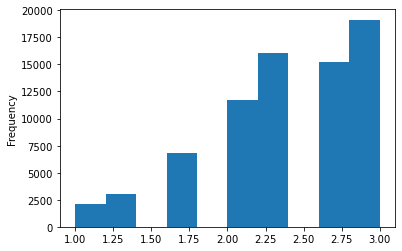

In [172]:
df.relevance.plot.hist()

In [173]:
data = {}
data['low relevance'] = list(df[df['relevance'] < 2.5]['search_term'])
data['high relevance'] = list(df[df['relevance'] >= 2.5]['search_term'])

In [177]:
output_file = 'output/search_relevance.json'
with open(output_file, 'w') as outfile:
    json.dump(data, outfile)

## Product Reviews

Reviews of products from Jianmo Ni's [Amazon Review Data](https://nijianmo.github.io/amazon/index.html#complete-data) dataset.

In [197]:
review_files = [
    ('data/amazon_reviews/AMAZON_FASHION_5.json','output/amazon_fashion_reviews.json'),
    ('data/amazon_reviews/All_Beauty_5.json','output/beauty_reviews.json'),
    ('data/amazon_reviews/Appliances_5.json','output/appliances_reviews.json'),
    ('data/amazon_reviews/Arts_Crafts_and_Sewing_5.json','output/arts_crafts_reviews.json'),
    ('data/amazon_reviews/Cell_Phones_and_Accessories_5.json','output/phone_reviews.json'),
    ('data/amazon_reviews/Automotive_5.json','output/automotive_reviews.json')
]
for input_file, output_file in review_files:
    print(input_file)
    df = pd.read_json(input_file, lines=True)
    data = {}
    for rating in df['overall'].unique():
        data[str(rating)] = tokenize_chain(df[df['overall'] == rating]['reviewText'].astype(str))
    with open(output_file, 'w') as outfile:
        json.dump(data, outfile)

data/amazon_reviews/AMAZON_FASHION_5.json
data/amazon_reviews/All_Beauty_5.json
data/amazon_reviews/Appliances_5.json
data/amazon_reviews/Arts_Crafts_and_Sewing_5.json
data/amazon_reviews/Cell_Phones_and_Accessories_5.json
data/amazon_reviews/Automotive_5.json


In [191]:
df['overall'].value_counts()

5    2158
4     471
3     337
1     117
2      93
Name: overall, dtype: int64